LOADING IRIS DATASET

Dataset shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float

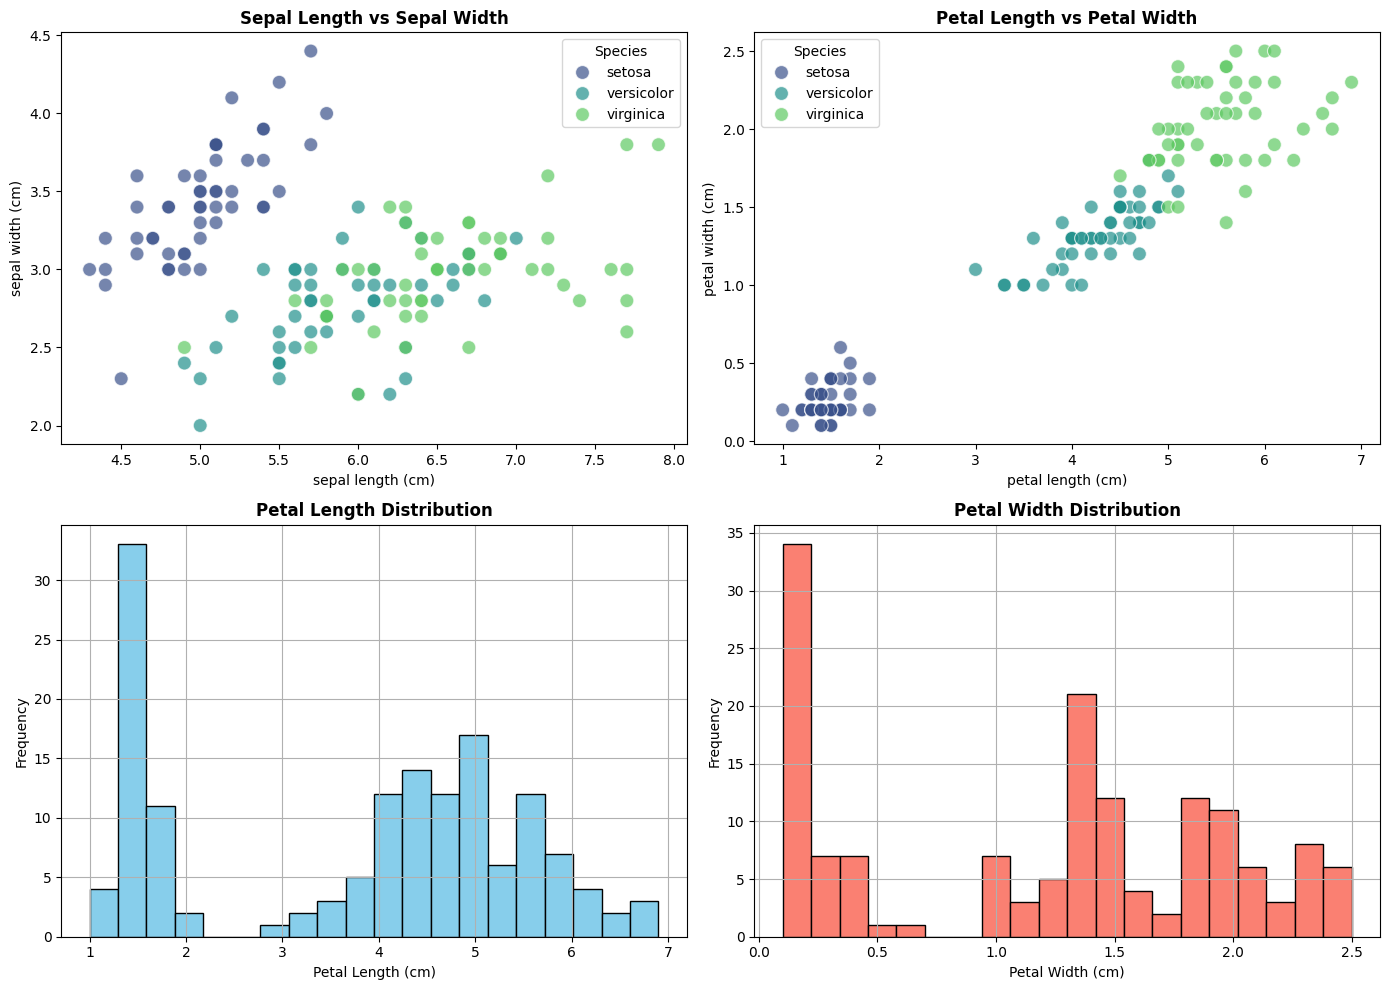

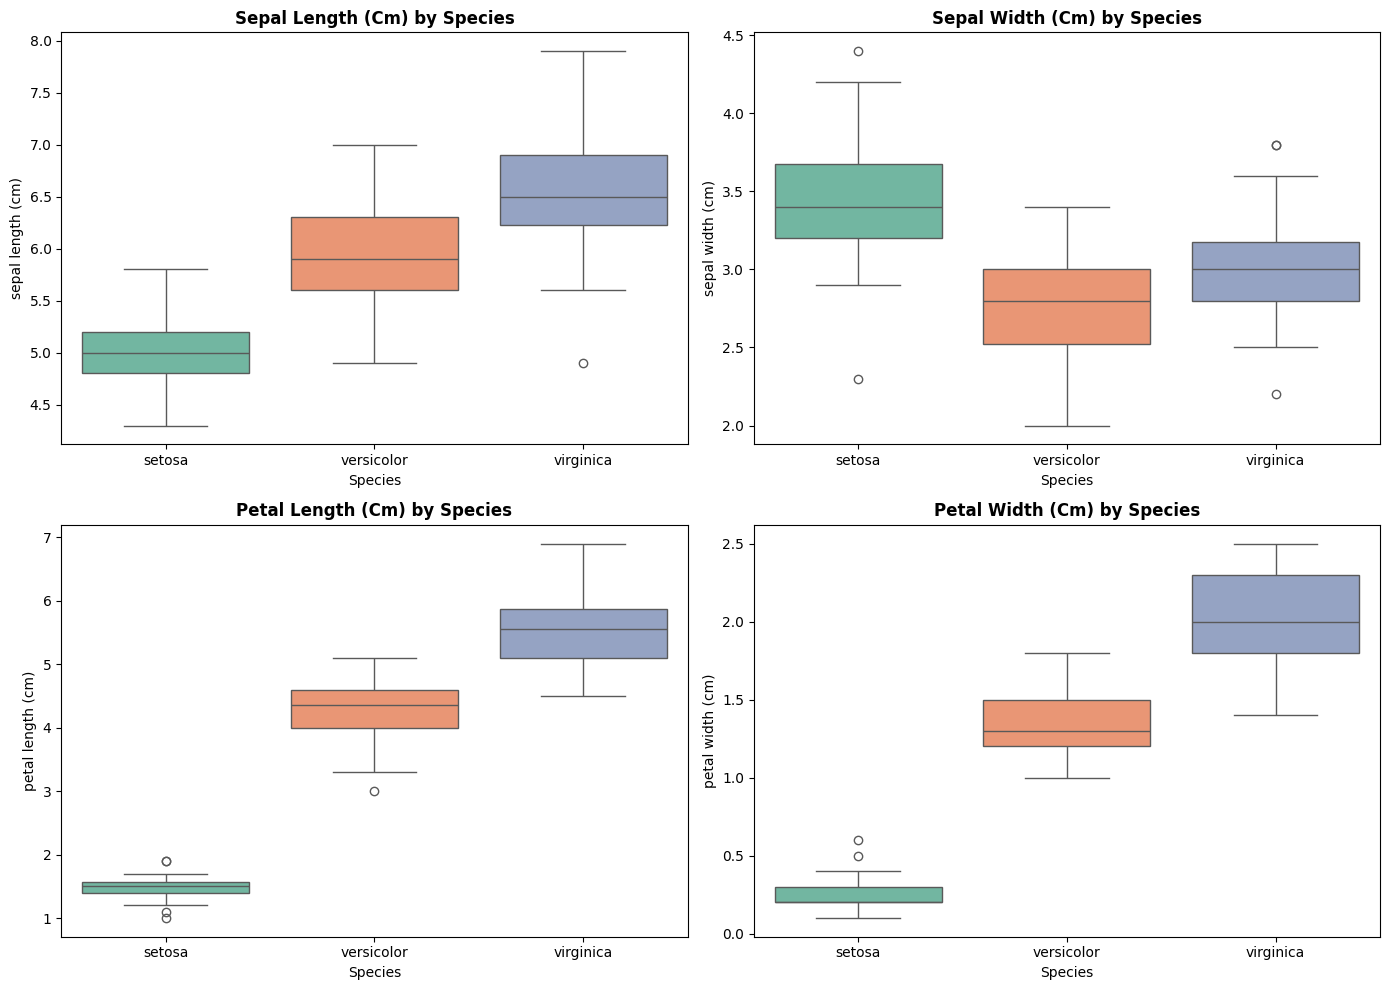

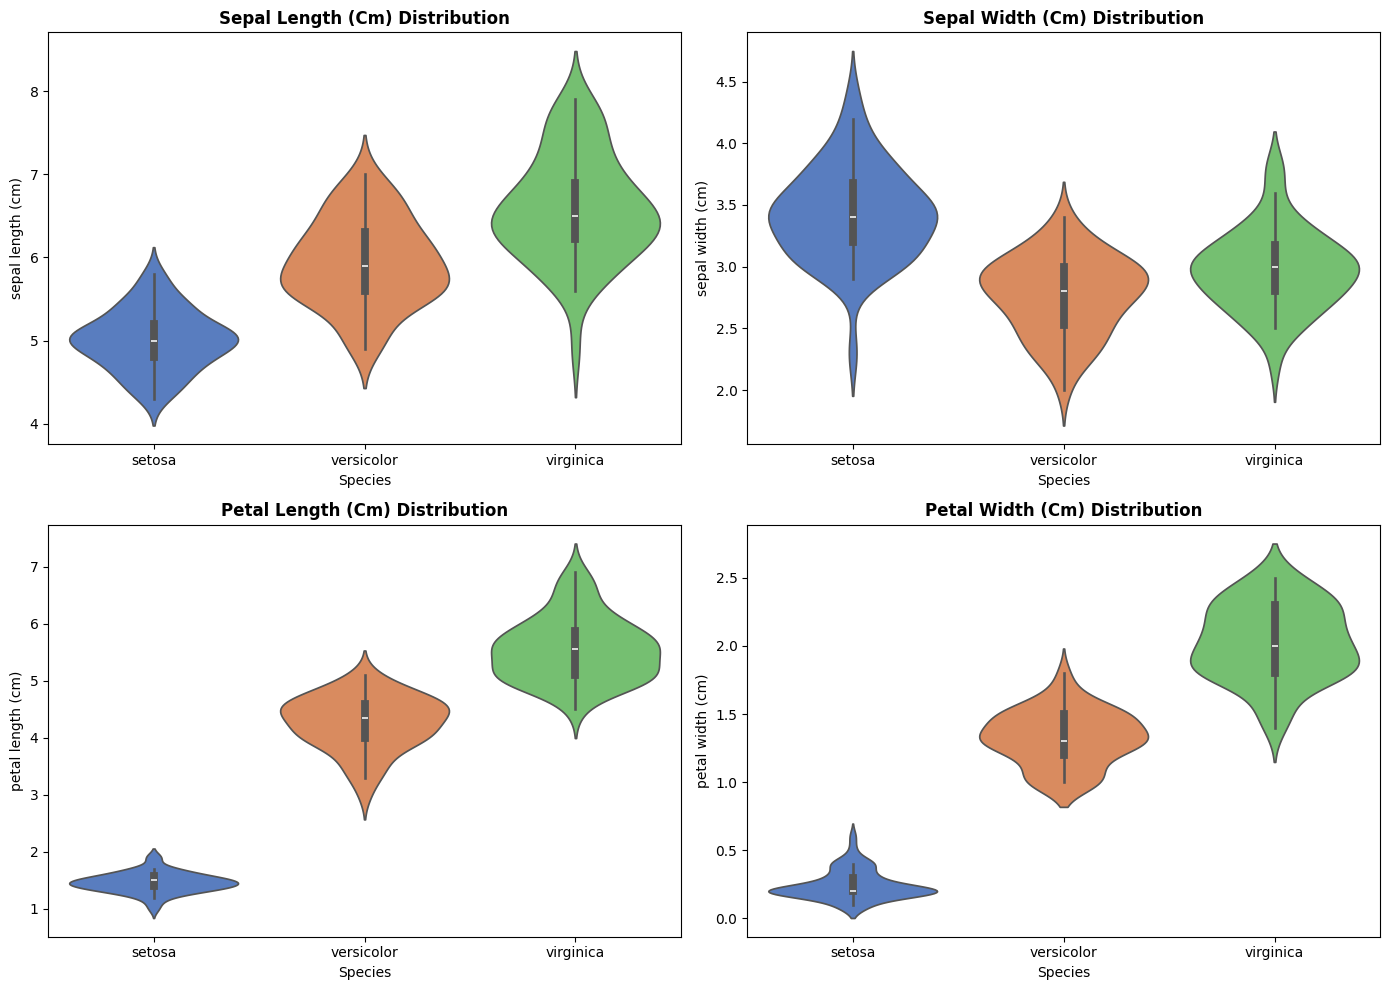

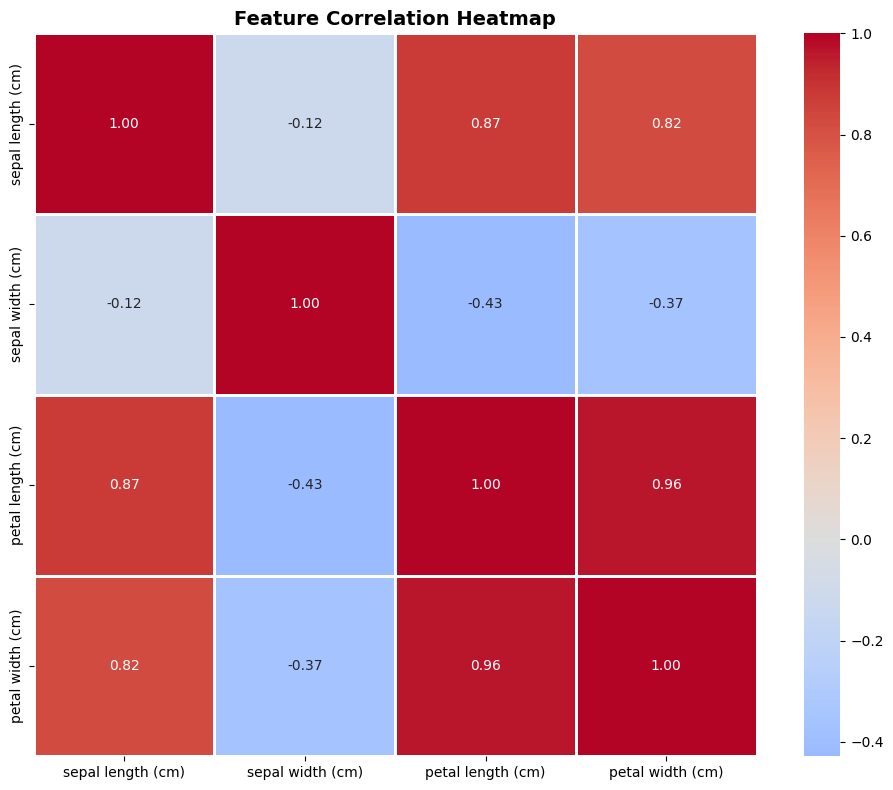


Generating comprehensive pairplot...


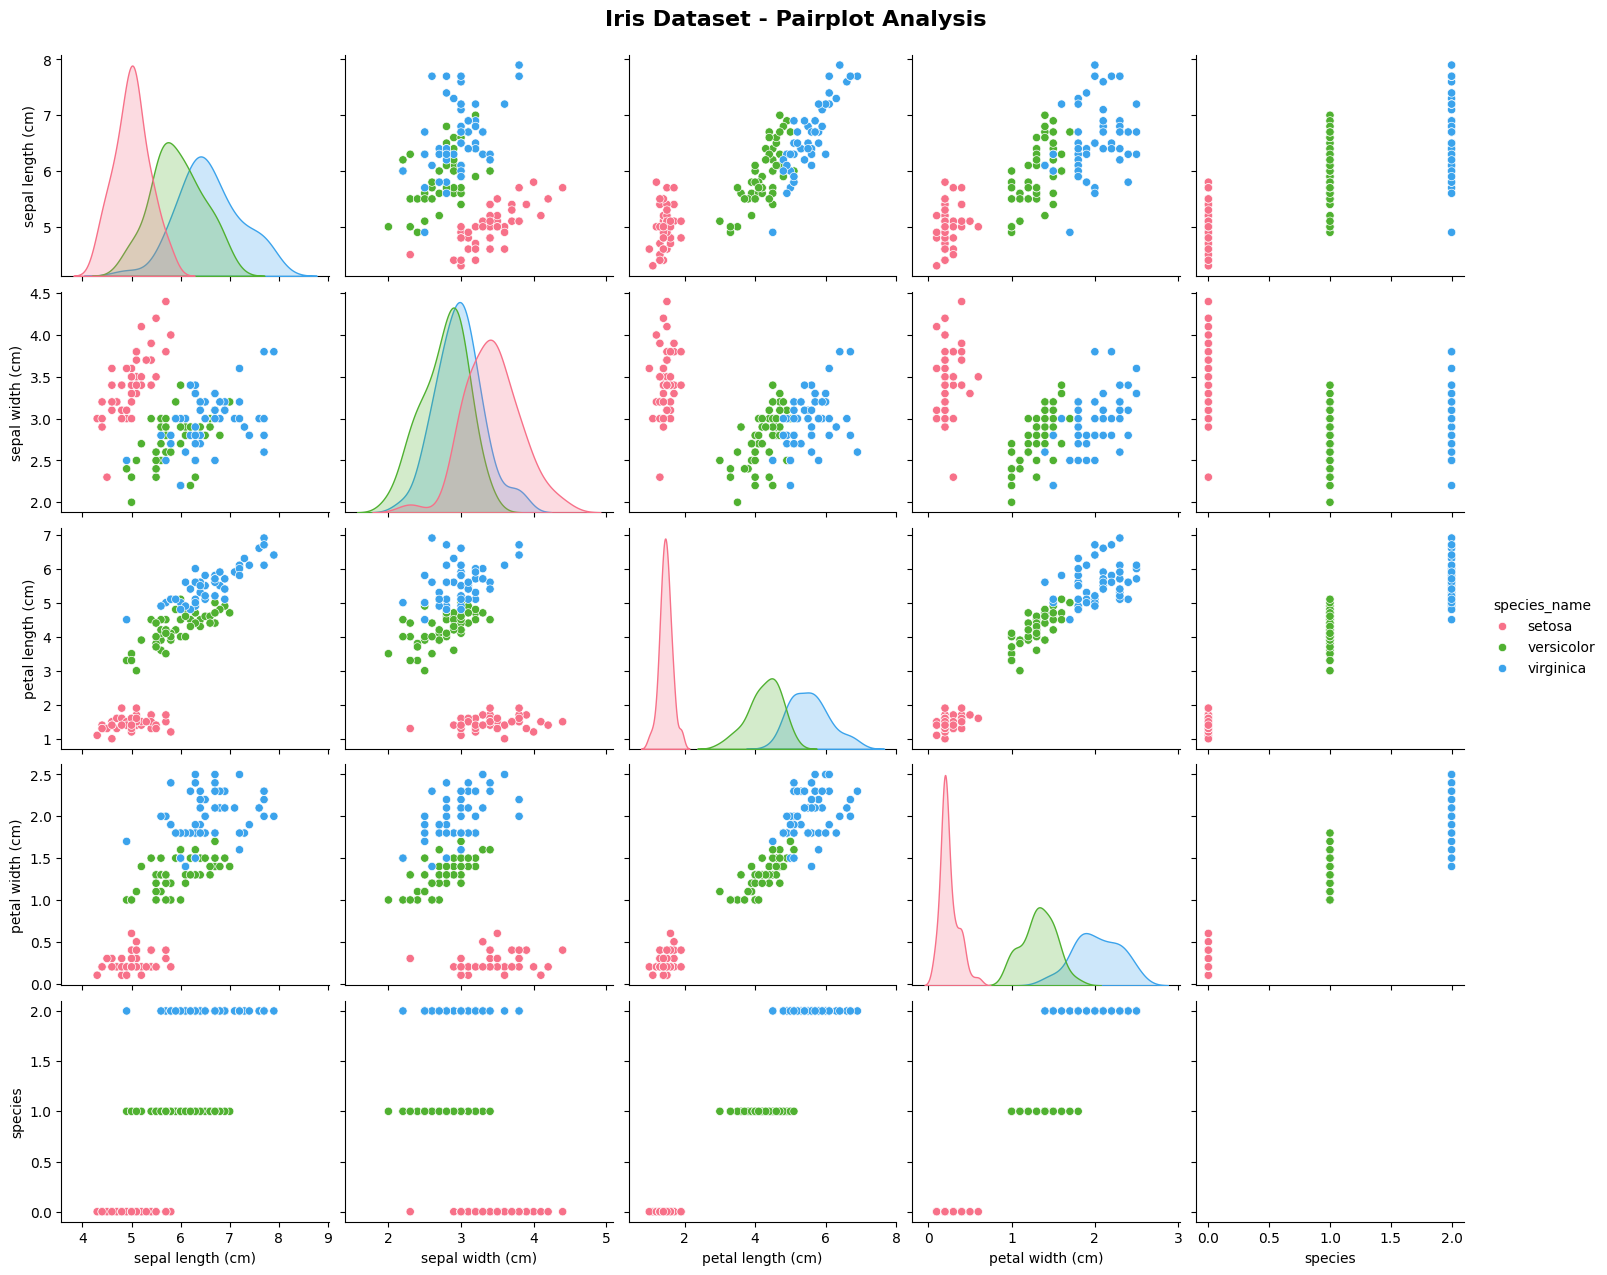


SPLITTING DATA
Training set size: 105 samples
Testing set size: 45 samples

TRAINING LOGISTIC REGRESSION MODEL
Model training completed!

MAKING PREDICTIONS

Sample predictions (first 10):
       Actual   Predicted
0   virginica   virginica
1  versicolor  versicolor
2   virginica  versicolor
3  versicolor  versicolor
4   virginica   virginica
5   virginica   virginica
6  versicolor  versicolor
7  versicolor  versicolor
8      setosa      setosa
9   virginica   virginica

MODEL EVALUATION

Accuracy: 0.9333 (93.33%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


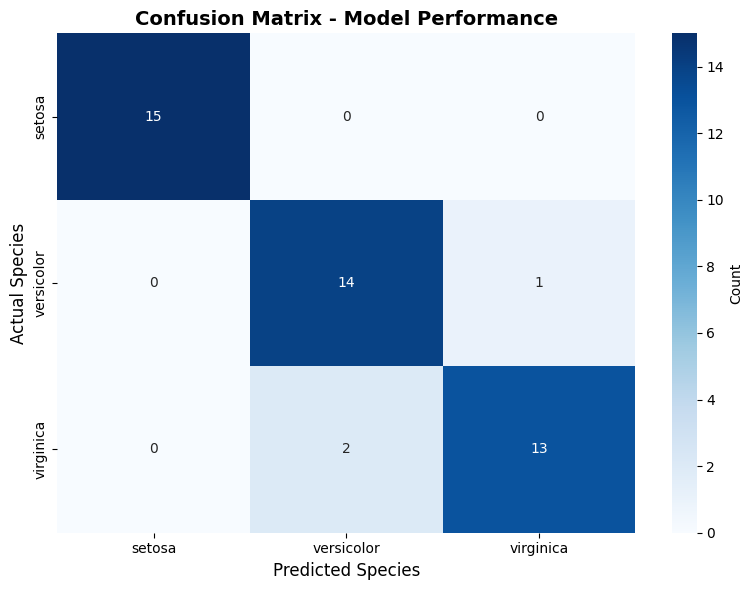

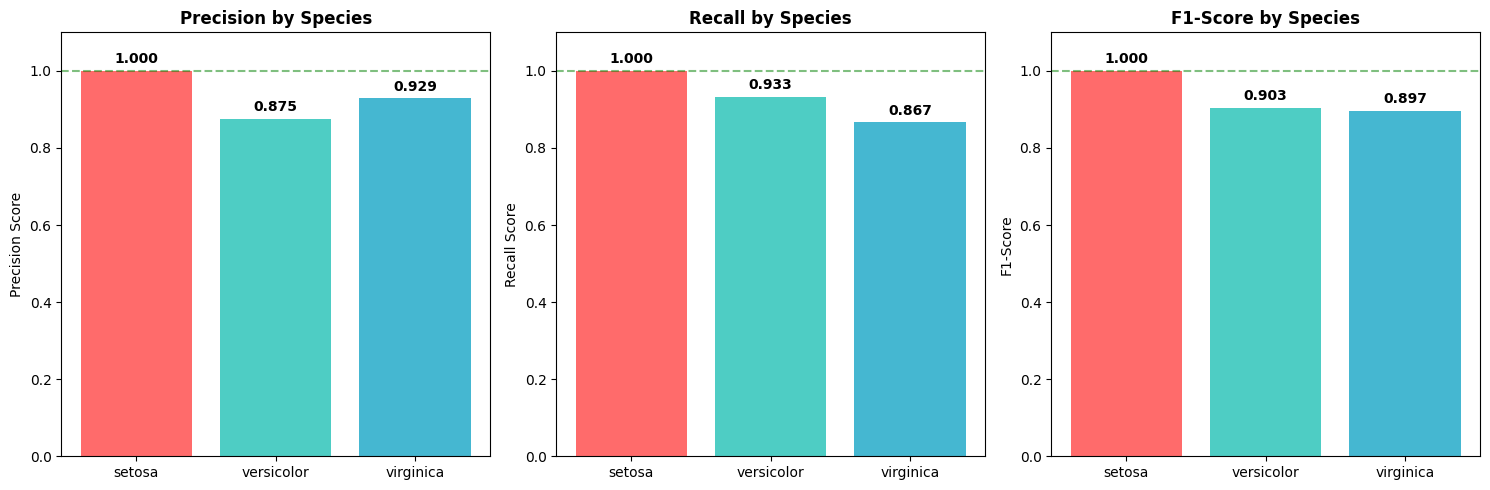


Generating decision boundary visualization...


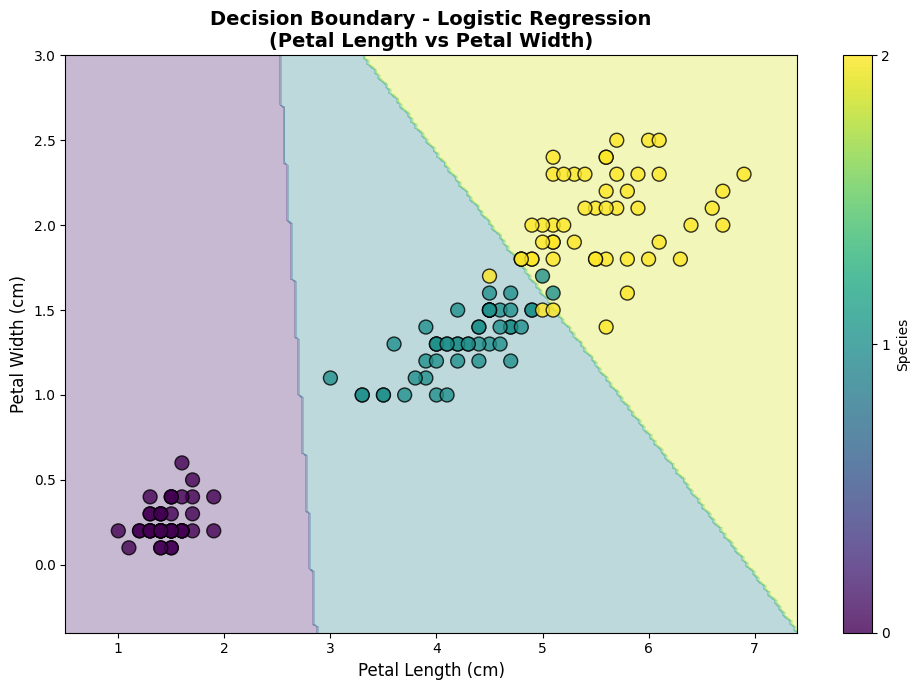


PREDICTING NEW DATA

New flower measurements and predictions:

Flower 1:
  Measurements: Sepal Length=5.1, Sepal Width=3.5, Petal Length=1.4, Petal Width=0.2
  Predicted Species: setosa
  Confidence: 97.68%
  Probabilities: Setosa=0.977, Versicolor=0.023, Virginica=0.000

Flower 2:
  Measurements: Sepal Length=6.7, Sepal Width=3.0, Petal Length=5.2, Petal Width=2.3
  Predicted Species: virginica
  Confidence: 90.36%
  Probabilities: Setosa=0.000, Versicolor=0.096, Virginica=0.904

Flower 3:
  Measurements: Sepal Length=5.9, Sepal Width=3.0, Petal Length=4.2, Petal Width=1.5
  Predicted Species: versicolor
  Confidence: 87.05%
  Probabilities: Setosa=0.020, Versicolor=0.870, Virginica=0.109

MODEL TRAINING AND PREDICTION COMPLETED!


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("LOADING IRIS DATASET")
print("=" * 60)
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\nDataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 60)

print("\nMissing values:")
print(df.isnull().sum())

print("\nClass distribution:")
print(df['species_name'].value_counts())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                hue='species_name', ax=axes[0, 0], palette='viridis', s=100, alpha=0.7)
axes[0, 0].set_title('Sepal Length vs Sepal Width', fontsize=12, fontweight='bold')
axes[0, 0].legend(title='Species', loc='best')

sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)',
                hue='species_name', ax=axes[0, 1], palette='viridis', s=100, alpha=0.7)
axes[0, 1].set_title('Petal Length vs Petal Width', fontsize=12, fontweight='bold')
axes[0, 1].legend(title='Species', loc='best')

df['petal length (cm)'].hist(bins=20, ax=axes[1, 0], color='skyblue', edgecolor='black')
axes[1, 0].set_title('Petal Length Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')

df['petal width (cm)'].hist(bins=20, ax=axes[1, 1], color='salmon', edgecolor='black')
axes[1, 1].set_title('Petal Width Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = iris.feature_names

for i, (ax, feature) in enumerate(zip(axes.flatten(), features)):
    sns.boxplot(data=df, x='species_name', y=feature, ax=ax, palette='Set2')
    ax.set_title(f'{feature.title()} by Species', fontsize=12, fontweight='bold')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, (ax, feature) in enumerate(zip(axes.flatten(), features)):
    sns.violinplot(data=df, x='species_name', y=feature, ax=ax, palette='muted')
    ax.set_title(f'{feature.title()} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
correlation = df[iris.feature_names].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nGenerating comprehensive pairplot...")
pairplot = sns.pairplot(df, hue='species_name', palette='husl',
                        diag_kind='kde', height=2.5, aspect=1.2)
pairplot.fig.suptitle('Iris Dataset - Pairplot Analysis', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("\n" + "=" * 60)
print("SPLITTING DATA")
print("=" * 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

print("\n" + "=" * 60)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("=" * 60)

model = LogisticRegression(max_iter=200, random_state=42)

model.fit(X_train, y_train)
print("Model training completed!")

print("\n" + "=" * 60)
print("MAKING PREDICTIONS")
print("=" * 60)

y_pred = model.predict(X_test)

print("\nSample predictions (first 10):")
prediction_df = pd.DataFrame({
    'Actual': [iris.target_names[i] for i in y_test[:10]],
    'Predicted': [iris.target_names[i] for i in y_pred[:10]]
})
print(prediction_df)

print("\n" + "=" * 60)
print("MODEL EVALUATION")
print("=" * 60)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Model Performance', fontsize=14, fontweight='bold')
plt.ylabel('Actual Species', fontsize=12)
plt.xlabel('Predicted Species', fontsize=12)
plt.tight_layout()
plt.show()

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Species': iris.target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(metrics_df['Species'], metrics_df['Precision'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Precision by Species', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Precision Score')
axes[0].set_ylim([0, 1.1])
axes[0].axhline(y=1.0, color='green', linestyle='--', alpha=0.5, label='Perfect Score')
for i, v in enumerate(metrics_df['Precision']):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

axes[1].bar(metrics_df['Species'], metrics_df['Recall'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Recall by Species', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Recall Score')
axes[1].set_ylim([0, 1.1])
axes[1].axhline(y=1.0, color='green', linestyle='--', alpha=0.5, label='Perfect Score')
for i, v in enumerate(metrics_df['Recall']):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

axes[2].bar(metrics_df['Species'], metrics_df['F1-Score'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[2].set_title('F1-Score by Species', fontsize=12, fontweight='bold')
axes[2].set_ylabel('F1-Score')
axes[2].set_ylim([0, 1.1])
axes[2].axhline(y=1.0, color='green', linestyle='--', alpha=0.5, label='Perfect Score')
for i, v in enumerate(metrics_df['F1-Score']):
    axes[2].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nGenerating decision boundary visualization...")

X_2d = X[:, 2:4]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42, stratify=y)

model_2d = LogisticRegression(max_iter=200, random_state=42)
model_2d.fit(X_train_2d, y_train_2d)

x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis',
                     edgecolors='black', s=100, alpha=0.8)
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('Decision Boundary - Logistic Regression\n(Petal Length vs Petal Width)',
         fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Species', ticks=[0, 1, 2])
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("PREDICTING NEW DATA")
print("=" * 60)

new_data = np.array([[5.1, 3.5, 1.4, 0.2],
                     [6.7, 3.0, 5.2, 2.3],
                     [5.9, 3.0, 4.2, 1.5]])

predictions = model.predict(new_data)
probabilities = model.predict_proba(new_data)

print("\nNew flower measurements and predictions:")
for i, (data, pred, prob) in enumerate(zip(new_data, predictions, probabilities)):
    print(f"\nFlower {i+1}:")
    print(f"  Measurements: Sepal Length={data[0]}, Sepal Width={data[1]}, "
          f"Petal Length={data[2]}, Petal Width={data[3]}")
    print(f"  Predicted Species: {iris.target_names[pred]}")
    print(f"  Confidence: {max(prob)*100:.2f}%")
    print(f"  Probabilities: Setosa={prob[0]:.3f}, Versicolor={prob[1]:.3f}, Virginica={prob[2]:.3f}")

print("\n" + "=" * 60)
print("MODEL TRAINING AND PREDICTION COMPLETED!")
print("=" * 60)